# General Analysis For Phishing

Within this notebook we make it easier to run some of the analysis that we conducted to explore the relationship between presidential elections and the increase/decrease of phishing attacks.

In [2]:
# Make sure to run this in a virtual environment
!pip install -r requirements.txt

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


def count_phishing_submissions_by_month_year(year: int, file: str) -> None:
    """
    Given a dataset of times when phishing submissions were made, this function counts
    the number of occurrences of phishing submissions for each month of a given year
    and plots the results as a bar chart.

    Note: The dataset is assumed to be a text file with each line containing a date string.

    :param year: The year to count the number of phishing submissions for
    :param file: The file to read the phishing submissions from
    :return: None
    """

    # Load the date entries from the file
    with open(file, 'r') as file:
        date_list = file.read().splitlines()

    # Convert the list of date strings to a pandas DataFrame
    df = pd.DataFrame(date_list, columns=['submission_time'])

    # Convert 'submission_time' column to datetime format
    df['submission_time'] = pd.to_datetime(df['submission_time'])

    # Filter data for a specific year (e.g., 2024)
    df_filtered = df[df['submission_time'].dt.year == year]

    # Group by month and count the number of entries per month within that year
    monthly_counts = df_filtered.groupby(df_filtered['submission_time'].dt.month).size()

    # Plot the results
    plt.figure(figsize=(10, 6))
    monthly_counts.plot(kind='bar', color='skyblue')
    plt.title(f'Number of Online Verified Phishing Entries per Month in {year}')
    plt.xlabel('Month Number')
    plt.ylabel('Number of Online Verified Phishing Reports')
    plt.xticks(rotation=0)
    plt.grid(True)

    plt.show()

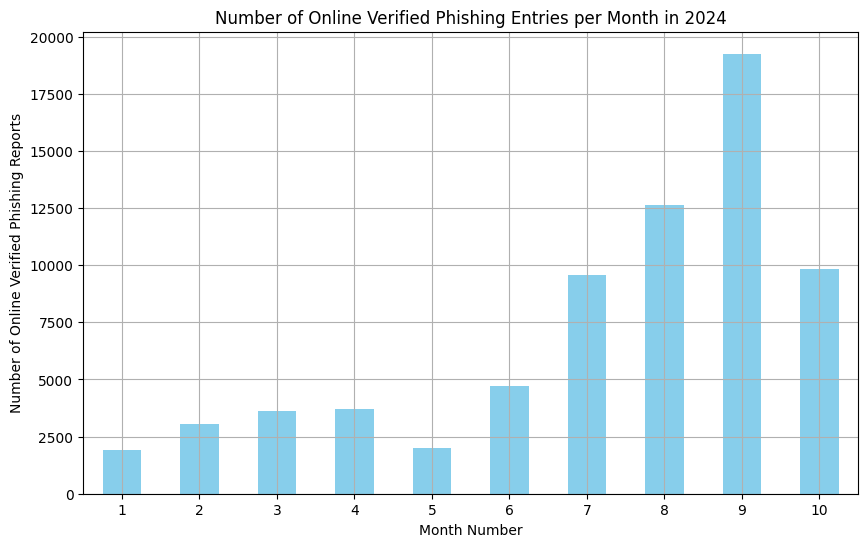

In [4]:
# Run the phishing per month analysis for 2024
count_phishing_submissions_by_month_year(2024, 'resources/submission_times_2024_10_18.txt')

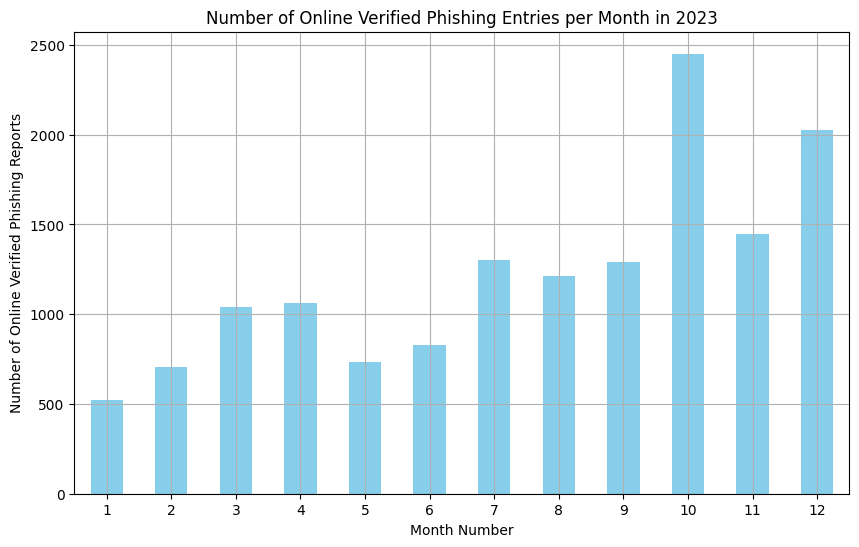

In [5]:
# Run the phishing per month analysis for 2023
count_phishing_submissions_by_month_year(2023, 'resources/submission_times_2024_10_18.txt')

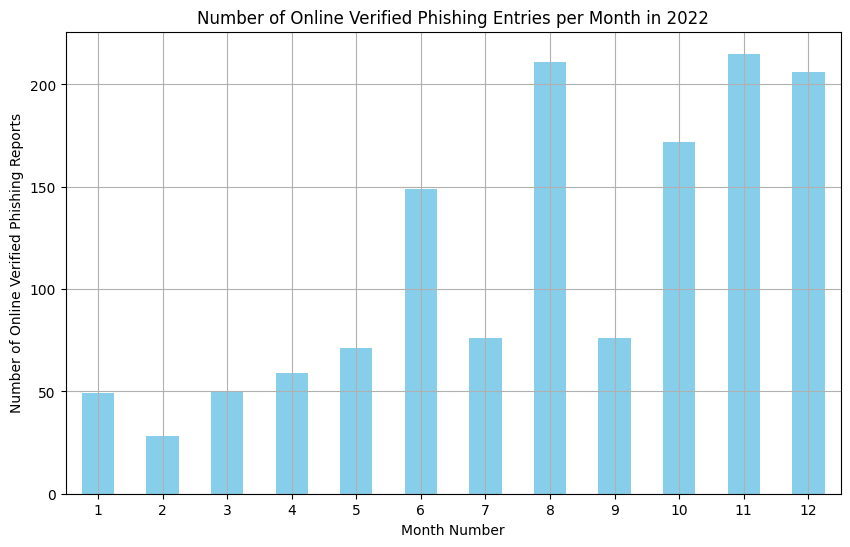

In [6]:
# Run the phishing per month analysis for 2022
count_phishing_submissions_by_month_year(2022, 'resources/submission_times_2024_10_18.txt')

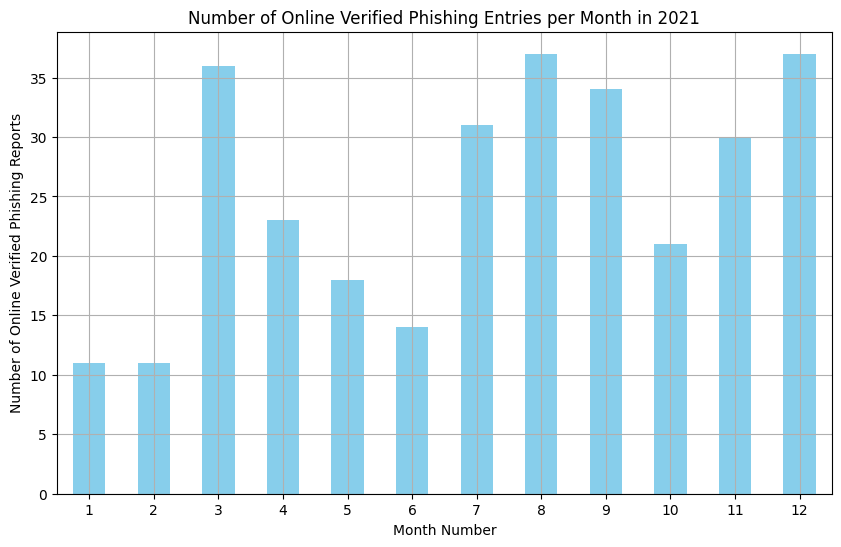

In [7]:
# Run the phishing per month analysis for 2021
count_phishing_submissions_by_month_year(2021, 'resources/submission_times_2024_10_18.txt')

In [23]:
import datetime
from typing import Optional

def temporal_decay(file: str, time_window: str, years_back: Optional[int]=None) -> None:
    """
    Given a dataset containing online verified phishing submissions, this function
    will plot the number of submissions over time to illustrate how the more we look back
    in time, the fewer submissions we find, due to the fact that phishing URLs are taken down
    relatively quickly.

    The dataset is a json array containing the following fields:
    - phish_id: The unique identifier of the phishing submission
    - url: The URL that was submitted
    - phish_detail_url: The URL that shows the details of the phishing submission (on PhishTank)
    - submission_time: The time when the phishing submission was made
    - verified: Whether the phishing submission was verified or not
    - verification_time: The time when the phishing submission was verified
    - online: Whether the phishing submission was online or not
    - target: The target of the phishing submission (i.e. the company being impersonated)
    - details: The details of the phishing submission which is an array that contains the following fields:
        - ip_address: The IP address of the phishing site
        - cidr_block: The CIDR block of the IP address
        - announcing_network: The network announcing the IP address
        - rir: The Regional Internet Registry of the IP address
        - country: The country where the phishing site is hosted
        - detail_time: The time when the details were recorded

    :param file: The file to read the phishing submissions from
    :param time_window: The time window to resample the data by (e.g., 'W' for weekly, 'ME' for monthly, 'D' for daily)
    :param years_back: The number of years to look back in time
    """

    # Load the phishing submissions from the file
    df = pd.read_json(file)

    # Convert 'submission_time' to datetime if not already
    df['submission_time'] = pd.to_datetime(df['submission_time'], errors='coerce')

    # Drop rows with missing or invalid submission times
    df = df.dropna(subset=['submission_time'])

    # Filter to include only data from the last x years if specified
    if years_back is not None:
        # Get the current time with the same timezone as 'submission_time'
        current_time = pd.Timestamp.now(tz='UTC')
        x_years_ago = current_time - pd.DateOffset(years=years_back)
        
        # Ensure 'submission_time' is in datetime format with the same timezone
        df['submission_time'] = pd.to_datetime(df['submission_time']).dt.tz_convert('UTC')
        
        # Filter the DataFrame
        df = df[df['submission_time'] >= x_years_ago]

    # Set the index to 'submission_time' for easier resampling
    df.set_index('submission_time', inplace=True)

    # Resample data by chosen time window (you can also choose 'W' for weekly, 'D' for daily, etc.)
    if (time_window not in ['W', 'ME', 'D']):
        print('Invalid time window. Please choose a valid time window (e.g., W, ME, D)')
        return
    
    time_window_submissions = df.resample(time_window).size()
    time_window_submissions.index = time_window_submissions.index.to_period('M').to_timestamp()


    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(time_window_submissions.index, time_window_submissions.values, label='Phishing Submissions Over Time')
    
    # Add titles and labels
    plt.title('Phishing Submissions Over Time (Temporal Decay)', fontsize=16)
    plt.xlabel('Time', fontsize=10)
    plt.ylabel('Number of Valid Online Submissions', fontsize=10)

    every_other_2_months = time_window_submissions.index[::2]  # Select every 2nd month from the index
    plt.xticks(every_other_2_months, every_other_2_months.strftime('%Y-%m'), rotation=90, ha='right')

    
    # Show grid for better readability
    plt.grid(True)
    
    # Display the plot
    plt.tight_layout()
    plt.show()

In [ ]:
# Run the temporal decay analysis
temporal_decay('resources/online-valid-phishing-dataset.json', 'D')

In [ ]:
# Run the temporal decay analysis for the last 3 years for monthly data
temporal_decay('resources/online-valid-phishing-dataset.json', 'W', years_back=2)